In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline 

In [26]:
data_train = np.load("clean_train.npy")
data_test = np.load("clean_test.npy")

df_train = pd.DataFrame(list(data_train))
df_test = pd.DataFrame(list(data_test))

print("Train data shape:", df_train.shape)
print("Test data shape:", df_test.shape)
train_number = df_train.shape[0] # to re-cut sets

target = df_train.pp
test_usernames = df_test.username 
print(target.shape)

# Lets concat test and train for data analizing and preprocessing
df = pd.concat([df_train.drop(['pp'], axis=1, inplace=False), df_test])
print("Full data shape:", df.shape)
df.head()
# df_test.head()

Train data shape: (6976, 28)
Test data shape: (2994, 27)
(6976,)
Full data shape: (9970, 27)


,A,S,SS,age,country,country_rank,favourite_beatmapset_count,follower_count,hit_accuracy,is_active,...,playstyle,post_count,previous_usernames,ranked_and_approved_beatmapset_count,ranked_score,replays_watched_by_others,replays_watched_counts,total_hits,total_score,username
0,651.0,803.0,28.0,16.0,Chile,1.0,60,9204,98.3008,True,...,"[keyboard, tablet]",9,[TrollFk],0,35956687428,188557,"[{'count': 2, 'start_date': '2015-05-01'}, {'c...",28378396,367849125665,Mathi
1,1034.0,405.0,189.0,19.0,Poland,1.0,14,48041,98.9178,True,...,"[keyboard, tablet]",15,[],0,46649498415,1720746,"[{'count': 19, 'start_date': '2013-11-01'}, {'...",42410479,467840602465,Rafis
2,839.0,787.0,52.0,14.0,United States,1.0,10,17495,98.4025,True,...,[touch],10,[Vaxei],0,29827153244,464031,"[{'count': 1, 'start_date': '2014-11-01'}, {'c...",22063826,216798962074,Donkey Kong
3,1171.0,490.0,27.0,NaN,Lithuania,1.0,61,5413,99.0310,True,...,"[mouse, keyboard]",17,"[Azuren, Cainon]",0,15928388241,93667,"[{'count': 4, 'start_date': '2015-05-01'}, {'c...",15468426,108398366502,Azerite
4,912.0,3450.0,234.0,22.0,China,1.0,51,5702,97.5871,True,...,"[keyboard, tablet]",94,"[kamiyo-sama, Kamiyo-sama, Tokichii]",0,53430781951,42061,"[{'count': 22, 'start_date': '2012-01-01'}, {'...",30409606,327137749103,Totoki


In [27]:
# df.describe()

### deleting obviously unimportant fields

In [28]:
df = df.drop(['username', 'country', 'monthly_playcounts', 'previous_usernames', 'replays_watched_counts', "join_date"  ], axis=1)
# df.head()

### Checking missing data (True field means we have missing data)

In [29]:

missing_data = df.isnull()
missing_data_test = df_test.isnull()

# for column in missing_data.columns.values.tolist():
#     print(column)
#     print (missing_data[column].value_counts())
#     print("")
    
# #

So we missing **"Playstyle" : 499**, **"age" : 3005** and **"country_rank" : 50** lets replace first one with word "Missing"  and last two with their means. Also we will convert "playstyle" array to a string

In [30]:
df["playstyle"].replace(np.nan, "Missing", inplace = True)

avg_age=df['age'].mean(axis=0)
df['age'].replace(np.nan, avg_age, inplace= True)

avg_rank=df['country_rank'].mean(axis=0)
df['country_rank'].replace(np.nan, avg_rank, inplace= True)

df["playstyle"] = df.playstyle.apply(lambda x: "-".join(x))



In [31]:
# df.head()

### Now lets check data types of our features, and see is there **Categorical variables**

In [32]:
# df.dtypes

We have 3 categorical values, **"Is_active"**, **"is_supporter"**, and **"playstyle"**
Let's look at the relationship between them and "pp" 

In [33]:
# fig = plt.figure(figsize=(16,9)) # create figure

# ax0 = fig.add_subplot(2, 2, 1)
# ax1 = fig.add_subplot(222) 
# ax2 = fig.add_subplot(223) 

# # (remember! we need to take only training part of our data)
# sns.boxplot(x=df.playstyle[:train_number], y=target, ax=ax0)
# sns.boxplot(x=df.is_active[:train_number], y=target,  ax=ax1)
# sns.boxplot(x=df.is_supporter[:train_number], y=target, ax=ax2)


The distributions of **"pp"** between **"Is_active", "is_supporter", "playstyle"** have a significant overlap, and so they would not be a good predictors, lets drop them

In [34]:
# drop categoricals, no info 
df.drop("playstyle", axis = 1, inplace=True)
df.drop("is_supporter", axis = 1, inplace=True)
df.drop("is_active", axis = 1, inplace=True)
# df.head()

### Normalization, simply deviding all freutures by their max value

In [35]:
# df['A'] = df['A']/df['A'].max()
# df['S'] = df['S']/df['S'].max()
# df['SS'] = df['SS']/df['SS'].max()
# df['age'] = df['age']/df['age'].max()
# df['favourite_beatmapset_count'] = df['favourite_beatmapset_count']/df['favourite_beatmapset_count'].max()
# df['follower_count'] = df['follower_count']/df['follower_count'].max()
# df['hit_accuracy'] = df['hit_accuracy']/df['hit_accuracy'].max()
# df['play_count'] = df['play_count']/df['play_count'].max()
# df['play_time'] = df['play_time']/ df['play_time'].max()
# df['post_count'] = df['post_count']/df['post_count'].max()
# df['ranked_score'] = df['ranked_score']/df['ranked_score'].max()
# df['replays_watched_by_others'] = df['replays_watched_by_others']/df['replays_watched_by_others'].max()
# df['total_hits'] = df['total_hits']/df['total_hits'].max()
# df['total_score'] = df['total_score']/df['total_score'].max()
# df['level'] = df['level']/df['level'].max()
# df['maximum_combo'] = df['maximum_combo']/df['maximum_combo'].max()
# df['country_rank'] = df['country_rank']/df['country_rank'].max()
# df['ranked_and_approved_beatmapset_count'] = df['ranked_and_approved_beatmapset_count']/df['ranked_and_approved_beatmapset_count'].max()

from sklearn import preprocessing

x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled, columns=list(df.columns.values))
print(min(df.ranked_score))
df.head()


0.0


,A,S,SS,age,country_rank,favourite_beatmapset_count,follower_count,hit_accuracy,level,maximum_combo,play_count,play_time,post_count,ranked_and_approved_beatmapset_count,ranked_score,replays_watched_by_others,total_hits,total_score
0,0.111491,0.051036,0.003059,0.155340,0.0,0.60,0.096412,0.971764,0.961165,0.328092,0.359355,0.328630,0.000559,0.0,0.133398,0.029131,0.511128,0.479170
1,0.176984,0.025740,0.015074,0.184466,0.0,0.14,0.503232,0.982017,0.970874,0.328415,0.672123,0.516909,0.000932,0.0,0.173068,0.265848,0.763874,0.609422
2,0.143639,0.050019,0.004850,0.135922,0.0,0.10,0.183261,0.973454,0.941748,0.377791,0.342833,0.280508,0.000621,0.0,0.110657,0.071691,0.397390,0.282408
3,0.200410,0.031143,0.002985,0.195657,0.0,0.61,0.056701,0.983898,0.932039,0.154145,0.201934,0.180555,0.001056,0.0,0.059093,0.014471,0.278593,0.141202
4,0.156122,0.219270,0.018431,0.213592,0.0,0.51,0.059729,0.959904,0.961165,0.272051,0.347356,0.338947,0.005842,0.0,0.198226,0.006498,0.547714,0.426138


### we can calculate the correlation between variables (befor plotting i will remove outliers)

(6976, 19)
(5968, 19)


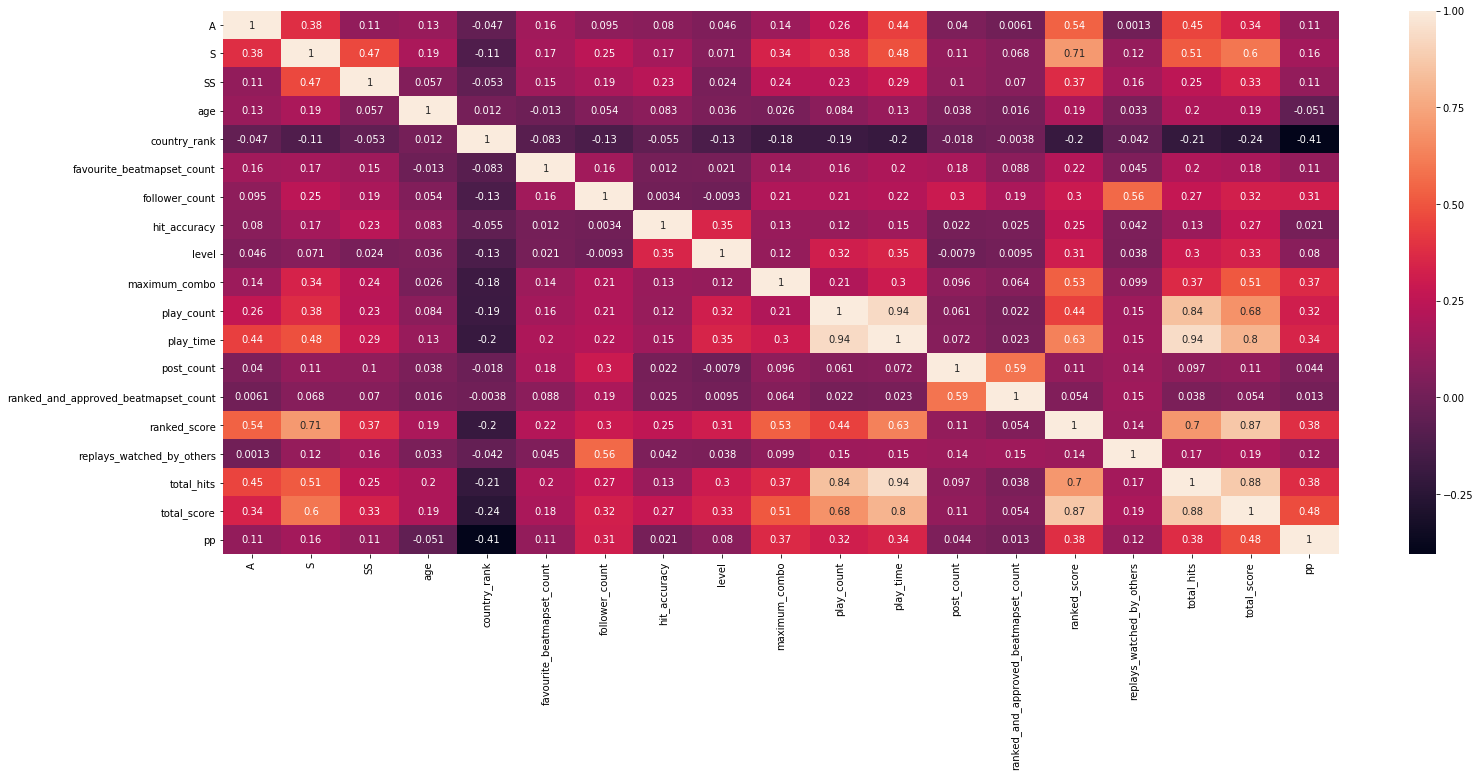

In [36]:
training_data = pd.concat([df[:train_number], target], axis=1)

no_outliers = training_data.copy(deep=True)[(np.abs(stats.zscore(training_data)) < 3).all(axis=1)]

print(training_data.shape)
print(no_outliers.shape)
# features = ['A', 'S', 'SS', 'age', 'country_rank','favourite_beatmapset_count', 'follower_count', 'hit_accuracy', 'level', 'maximum_combo', 'play_count', 'play_time', 'post_count', 'ranked_and_approved_beatmapset_count', 'ranked_score', 'replays_watched_by_others', 'total_hits', 'total_score' ]





corr = no_outliers.corr()
fig, ax = plt.subplots(figsize=(25,10)) 
sns.heatmap(corr, xticklabels=corr.columns.values, annot=True, yticklabels=corr.columns.values, ax=ax)

In order to start understanding the (linear) relationship between an individual variable and the **pp**. We can do this by using "regplot", which plots the scatterplot plus the fitted regression line for the data

In [37]:

# fig = plt.figure(figsize=(20, 40)) # create figure

# ax1 = fig.add_subplot(631)
# ax2 = fig.add_subplot(632) 
# ax3 = fig.add_subplot(633)
# ax4 = fig.add_subplot(634)
# ax5 = fig.add_subplot(635)
# ax6 = fig.add_subplot(636)
# ax7 = fig.add_subplot(637)
# ax8 = fig.add_subplot(638)
# ax9 = fig.add_subplot(639)
# ax10 = fig.add_subplot(6,3,10)
# ax11 = fig.add_subplot(6,3,11)
# ax12 = fig.add_subplot(6,3,12)
# ax13 = fig.add_subplot(6,3,13)
# ax14 = fig.add_subplot(6,3,14)
# ax15 = fig.add_subplot(6,3,15)
# ax16 = fig.add_subplot(6,3,16)
# ax17 = fig.add_subplot(6,3,17)
# ax18 = fig.add_subplot(6,3,18)

# # ax18.set_xlim(0, 1)
# # ax3.set_xlim(0, 1)
# # sns.pairplot(no_outliers, vars=["country_rank", "pp"])

# sns.regplot(x="ranked_and_approved_beatmapset_count", y="pp", data=no_outliers, ax=ax1, fit_reg=True)
# sns.regplot(x="total_score", y="pp", data=no_outliers, ax=ax2, fit_reg=True)
# sns.regplot(x="country_rank", y="pp", data=no_outliers, ax=ax3, fit_reg=True)
# sns.regplot(x="A", y="pp", data=no_outliers, ax=ax4, fit_reg=True)
# sns.regplot(x="S", y="pp", data=no_outliers, ax=ax5, fit_reg=True)
# sns.regplot(x="SS", y="pp", data=no_outliers, ax=ax6, fit_reg=True)
# sns.regplot(x="age", y="pp", data=no_outliers, ax=ax7, fit_reg=True)
# sns.regplot(x="favourite_beatmapset_count", y="pp", data=no_outliers, ax=ax8, fit_reg=True)
# sns.regplot(x="follower_count", y="pp", data=no_outliers, ax=ax9, fit_reg=True)
# sns.regplot(x="hit_accuracy", y="pp", data=no_outliers, ax=ax10, fit_reg=True)
# sns.regplot(x="level", y="pp", data=no_outliers, ax=ax11, fit_reg=True)
# sns.regplot(x="maximum_combo", y="pp", data=no_outliers, ax=ax12, fit_reg=True)
# sns.regplot(x="play_count", y="pp", data=no_outliers, ax=ax13, fit_reg=True)
# sns.regplot(x="play_time", y="pp", data=no_outliers, ax=ax14, fit_reg=True)
# sns.regplot(x="post_count", y="pp", data=no_outliers, ax=ax15, fit_reg=True)
# sns.regplot(x="ranked_score", y="pp", data=no_outliers, ax=ax16, fit_reg=True)
# sns.regplot(x="replays_watched_by_others", y="pp", data=no_outliers, ax=ax17, fit_reg=True)
# sns.regplot(x="total_hits", y="pp", data=no_outliers, ax=ax18, fit_reg=True)

Not linear))))

In [38]:

# fig = plt.figure(figsize=(20, 40)) # create figure

# ax1 = fig.add_subplot(631)
# ax2 = fig.add_subplot(632) 
# ax3 = fig.add_subplot(633)
# ax4 = fig.add_subplot(634)
# ax5 = fig.add_subplot(635)
# ax6 = fig.add_subplot(636)
# ax7 = fig.add_subplot(637)
# ax8 = fig.add_subplot(638)
# ax9 = fig.add_subplot(639)
# ax10 = fig.add_subplot(6,3,10)
# ax11 = fig.add_subplot(6,3,11)
# ax12 = fig.add_subplot(6,3,12)
# ax13 = fig.add_subplot(6,3,13)
# ax14 = fig.add_subplot(6,3,14)
# ax15 = fig.add_subplot(6,3,15)
# ax16 = fig.add_subplot(6,3,16)
# ax17 = fig.add_subplot(6,3,17)
# ax18 = fig.add_subplot(6,3,18)

# sns.distplot(no_outliers.ranked_and_approved_beatmapset_count, ax=ax1)
# sns.distplot(no_outliers.total_score, ax=ax2)
# sns.distplot(no_outliers.country_rank, ax=ax3)
# sns.distplot(no_outliers.A, ax=ax4)
# sns.distplot(no_outliers.S, ax=ax5)
# sns.distplot(no_outliers.SS, ax=ax6)
# sns.distplot(no_outliers.age, ax=ax7)
# sns.distplot(no_outliers.favourite_beatmapset_count, ax=ax8)
# sns.distplot(no_outliers.follower_count, ax=ax9)
# sns.distplot(no_outliers.hit_accuracy, ax=ax10)
# sns.distplot(no_outliers.level, ax=ax11)
# sns.distplot(no_outliers.maximum_combo, ax=ax12)
# sns.distplot(no_outliers.play_count, ax=ax13)
# sns.distplot(no_outliers.play_time, ax=ax14)
# sns.distplot(no_outliers.post_count, ax=ax15)
# sns.distplot(no_outliers.ranked_score, ax=ax16)
# sns.distplot(no_outliers.replays_watched_by_others, ax=ax17)
# sns.distplot(no_outliers.total_hits, ax=ax18)

### Trying to find one super feature

In [39]:
# sns.pairplot(no_outliers, vars=["country_rank", "replays_watched_by_others"])

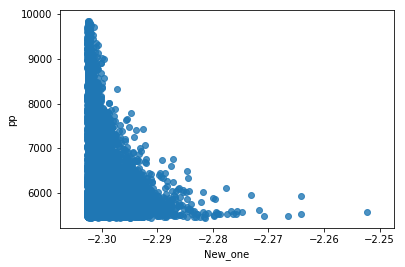

In [163]:
no_outliers["New_one"] = np.log(no_outliers.country_rank*no_outliers.ranked_score+0.1)

sns.regplot(x="New_one", y="pp", data=no_outliers, fit_reg=False)

In case of droping data

In [50]:
# df.drop("ranked_and_approved_beatmapset_count", axis = 1, inplace=True)
# df.drop("hit_accuracy", axis = 1, inplace=True)
# # df.drop("SS", axis = 1, inplace=True)
# # df.drop("A", axis = 1, inplace=True)
# df.drop("S", axis = 1, inplace=True)
# # df.drop("age", axis = 1, inplace=True)
# # df.drop("favourite_beatmapset_count", axis = 1, inplace=True)
# df.drop("level", axis = 1, inplace=True)
# # df.drop("post_count", axis = 1, inplace=True)
# df.drop("total_hits", axis = 1, inplace=True)
# # df.drop("replays_watched_by_others", axis = 1, inplace=True)
# df.drop("play_count", axis = 1, inplace=True)

# print(df.shape)
# df.head()

In [180]:
df["magic_feature"] = (df.country_rank*df.ranked_score)
df1 = df[['magic_feature', 'ranked_score' ]]
# df1 = df[['country_rank',  'ranked_score']]
training_data = pd.concat([df1[:train_number], target], axis=1)

print(training_data.shape)
training_no_outliers = training_data[(np.abs(stats.zscore(training_data)) <= 3).all(axis=1)]
# training_no_outliers = training_data[np.abs(training_data-training_data.mean())<=(training_data.std())]
print(training_data.mean())
print(training_no_outliers.shape)
training_no_outliers.head()

(6976, 3)
magic_feature       0.000281
ranked_score        0.059549
pp               6560.831422
dtype: float64
(6644, 3)


,magic_feature,ranked_score,pp
129,0.000019,0.118902,9880
130,0.000125,0.191963,9873
131,0.000063,0.157043,9860
133,0.000013,0.116492,9852
134,0.000022,0.123865,9845


In [181]:
target_no_outliers = training_no_outliers['pp']
training_no_outliers = training_no_outliers.drop(["pp"], axis = 1)
print(target_no_outliers.shape)
print(training_no_outliers.shape)

(6644,)
(6644, 2)


### Finally the train, test sets and target are

In [182]:
y = np.array(target_no_outliers)
X = np.array(training_no_outliers)
X_t = np.array(df1[train_number:])
usernames = np.array(test_usernames)

In [183]:
print(y.shape)
print(X.shape)
print(X_t.shape)

(6644,)
(6644, 2)
(2994, 2)


# Model creation

### My models

In [184]:
from numpy.linalg import inv
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

def RMSE(X, Y, b):
    predict = X.dot(b)
    for i in range(len(predict)):
        if predict[i] < 0:
            predict[i] = 6560 

    return np.mean((predict - Y) ** 2) ** (0.5)

def fit_linear_regression(X, Y, Lambda=0):

    # Identity matrix (number of parameters is the dimension)
    Identity = np.identity(len(X[1,:]))   
    # We don't add penalty to intercept
    Identity[0,0] = 0
    
    return inv(X.transpose().dot(X) + Lambda*Identity).dot(X.transpose()).dot(Y)

### Linear

In [185]:
kf = KFold(n_splits=5, shuffle=True)
kf.get_n_splits(X)
means=[]

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    poly = PolynomialFeatures(1)
    X_train = poly.fit_transform(X_train)
    X_test = poly.fit_transform(X_test)
    beta = fit_linear_regression(X_train, y_train)
    mean_err = RMSE(X_test, y_test, beta)
    means.append(mean_err)
print("Cross Validation error:", np.mean(means))

Cross Validation error: 761.2203548003972


### Polynomial

In [186]:
kf = KFold(n_splits=5, shuffle=True)
kf.get_n_splits(X)

for d in np.arange(1, 4):    
    means_poly = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        poly = PolynomialFeatures(d)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.fit_transform(X_test)
        beta = fit_linear_regression(X_train_poly, y_train)
        mean_err = RMSE(X_test_poly, y_test, beta)
        means_poly.append(mean_err)
    print("RMSE for polynome degree :", d, "is:", np.mean(means_poly))


RMSE for polynome degree : 1 is: 760.7103852380785
RMSE for polynome degree : 2 is: 733.7158194606197
RMSE for polynome degree : 3 is: 724.6245731883579


### Polynimial with Regularization

In [187]:
kf = KFold(n_splits=5, shuffle=True)
kf.get_n_splits(X)

for d in range(1, 4):  
    for a in np.arange(0, 10, 1):        
        mean_tmp = []
        for train_index, test_index in kf.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            poly = PolynomialFeatures(d, interaction_only=False)
            X_train_poly = poly.fit_transform(X_train)
            X_test_poly = poly.fit_transform(X_test)
            beta = fit_linear_regression(X_train_poly, y_train, a)
            mean_err = RMSE(X_test_poly, y_test, beta)
            mean_tmp.append(mean_err)
        if np.mean(mean_tmp) < 850:
            print("RMSE for polinom degree:", d, "and lambda:", a, "is : ", np.mean(mean_tmp))
            

        

RMSE for polinom degree: 1 and lambda: 0 is :  760.9644972658333
RMSE for polinom degree: 2 and lambda: 0 is :  733.3314060363583
RMSE for polinom degree: 3 and lambda: 0 is :  723.5689872335281


In [188]:
kf = KFold(n_splits=5, shuffle=True)
kf.get_n_splits(X)



for a in np.arange(0, 1, 0.1):        
        mean_tmp = []
        for train_index, test_index in kf.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            poly = PolynomialFeatures(3)
            X_train_poly = poly.fit_transform(X_train)
            X_test_poly = poly.fit_transform(X_test)
            beta = fit_linear_regression(X_train_poly, y_train, a)
            mean_err = RMSE(X_test_poly, y_test, beta)
            mean_tmp.append(mean_err)
        print("RMSE for polinom degree:", 3, "and lambda:", a, "is : ", np.mean(mean_tmp))

RMSE for polinom degree: 3 and lambda: 0.0 is :  723.3492105227438
RMSE for polinom degree: 3 and lambda: 0.1 is :  850.5549384018581
RMSE for polinom degree: 3 and lambda: 0.2 is :  850.8445093573616
RMSE for polinom degree: 3 and lambda: 0.30000000000000004 is :  851.2522658164398
RMSE for polinom degree: 3 and lambda: 0.4 is :  851.4211199007207
RMSE for polinom degree: 3 and lambda: 0.5 is :  851.5116221183378
RMSE for polinom degree: 3 and lambda: 0.6000000000000001 is :  851.2577378853259
RMSE for polinom degree: 3 and lambda: 0.7000000000000001 is :  851.5822780444381
RMSE for polinom degree: 3 and lambda: 0.8 is :  851.880287469757
RMSE for polinom degree: 3 and lambda: 0.9 is :  852.1158065194202


#### The best model is for polinom degree: 3 and lambda: 1

## With Sklearn regression models

In [189]:
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures

### Linear

In [190]:
# kf = KFold(n_splits=5, shuffle=True)
# kf.get_n_splits(X)
# means=[]

# for train_index, test_index in kf.split(X):
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]
#     reg = linear_model.LinearRegression()
#     reg = reg.fit(X_train, y_train)
#     predict = reg.predict(X_test)
#     mean_err = np.mean((predict - y_test) ** 2) ** 0.5
#     means.append(mean_err)
# print("Cross Validation error:", np.mean(means))

### Polynomial

In [191]:
# kf = KFold(n_splits=5, shuffle=True)
# kf.get_n_splits(X)

# for d in range(1, 4):    
#     means_poly = []
#     for train_index, test_index in kf.split(X):
#         X_train, X_test = X[train_index], X[test_index]
#         y_train, y_test = y[train_index], y[test_index]
#         poly = PolynomialFeatures(d)
#         X_train_poly = poly.fit_transform(X_train)
#         X_test_poly = poly.fit_transform(X_test)
#         reg = linear_model.LinearRegression()
#         reg = reg.fit(X_train_poly, y_train)
#         predict = reg.predict(X_test_poly)
#         means_poly.append(np.mean((predict - y_test) ** 2) ** (0.5))
#     print("RMSE for polynome degree :", d, "is:", np.mean(means_poly))

### Polynimial with Regularization

In [192]:
# kf = KFold(n_splits=5, shuffle=True)
# kf.get_n_splits(X)

# for d in range(1, 4):  
#     for a in range(0, 5, 1):
        
#         mean_tmp = 0
#         for train_index, test_index in kf.split(X):
#             X_train, X_test = X[train_index], X[test_index]
#             y_train, y_test = y[train_index], y[test_index]
#             poly = PolynomialFeatures(d)
#             X_train_poly = poly.fit_transform(X_train)
#             X_test_poly = poly.fit_transform(X_test)
#             reg = linear_model.Ridge(alpha = a)
#             reg = reg.fit(X_train_poly, y_train)
#             predict = reg.predict(X_test_poly)
#             mean_tmp+= np.mean((predict - y_test) ** 2) ** (0.5)
#         print("RMSE for polinom degree:", d, "and lambda:", a, "is : ", mean_tmp/5 )
        

### Prediction for real test set 

In [193]:
print(X_t.shape)
print(usernames.shape)

(2994, 2)
(2994,)


In [194]:
poly = PolynomialFeatures(3, interaction_only=False)
X_poly = poly.fit_transform(X)
X_t_poly = poly.fit_transform(X_t)

beta = fit_linear_regression(X_poly, y, 0)
print(beta.shape)
print(X_poly.shape)
predictions = X_t_poly.dot(beta)
print(predictions.shape)

(10,)
(6644, 10)
(2994,)


In [195]:
import json
print(usernames[0], predictions[0])

for i in range(len(predictions)):
    if predictions[i] < 0:
        print(i)
        predictions[i] = 6560
        
my_dict = dict(zip(usernames, predictions))
print(np.mean(predictions))
json.dump(my_dict, open("tigran_vardanyan.json", "w"))

result_df = pd.concat([pd.DataFrame(list(usernames)), pd.DataFrame(list(predictions))], axis=1)
result_df.to_csv("Tigran_Vardanyan_predictions.csv")
result_df.head(20)

Cookiezi 8289.959837290211
17
41
196
283
1053
1440
1737
1840
1881
2086
2211
2299
2423
2437
2447
2458
2644
2702
2714
2811
2817
2863
2904
2939
2950
6487.604547928069


,0,0
0,Cookiezi,8289.959837
1,filsdelama,8573.745316
2,firebat92,8620.322337
3,idke,8367.549704
4,Abyssal,7770.649867
5,hvick225,8656.552276
6,Freddie Benson,7070.253909
7,Dumii,8472.048714
8,fieryrage,8517.574735
9,Piggey,8640.981485
